# Assignment 1: Exploratory Data Analysis On JKaggle's Wine Quality Dataset

# Loading Dataset

*   Mount drive and load the dataset the dataset using Pandas library.
*   Dataset used for analysis is Wine Quality - https://www.kaggle.com/datasets/rajyellow46/wine-quality

In [16]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [17]:
import pandas as pd

In [18]:
wine_data = pd.read_csv('/content/drive/MyDrive/DM-Assignment-Dataset/winequalityN.csv')
wine_data

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,white,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,white,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,red,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
6493,red,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,NaN,11.2,6
6494,red,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
6495,red,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


## Data Understanding

In [20]:
# Display dataset dimensions and first few rows
data_shape = wine_data.shape
data_head = wine_data.head()

data_shape, data_head

((6497, 13),
     type  fixed acidity  volatile acidity  citric acid  residual sugar  \
 0  white            7.0              0.27         0.36            20.7   
 1  white            6.3              0.30         0.34             1.6   
 2  white            8.1              0.28         0.40             6.9   
 3  white            7.2              0.23         0.32             8.5   
 4  white            7.2              0.23         0.32             8.5   
 
    chlorides  free sulfur dioxide  total sulfur dioxide  density    pH  \
 0      0.045                 45.0                 170.0   1.0010  3.00   
 1      0.049                 14.0                 132.0   0.9940  3.30   
 2      0.050                 30.0                  97.0   0.9951  3.26   
 3      0.058                 47.0                 186.0   0.9956  3.19   
 4      0.058                 47.0                 186.0   0.9956  3.19   
 
    sulphates  alcohol  quality  
 0       0.45      8.8        6  
 1       0.49  

## Handling the missing values

In [21]:
# Check for missing values in each column
missing_values = wine_data.isnull().sum()

missing_values


type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64

In [23]:
# Impute missing values with median for the affected columns
for column in missing_values.index:
    if missing_values[column] > 0:
        wine_data[column].fillna(wine_data[column].median(), inplace=True)

# Verify if there are any remaining missing values
remaining_missing = wine_data.isnull().sum()

remaining_missing


type                    0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

# Visualization

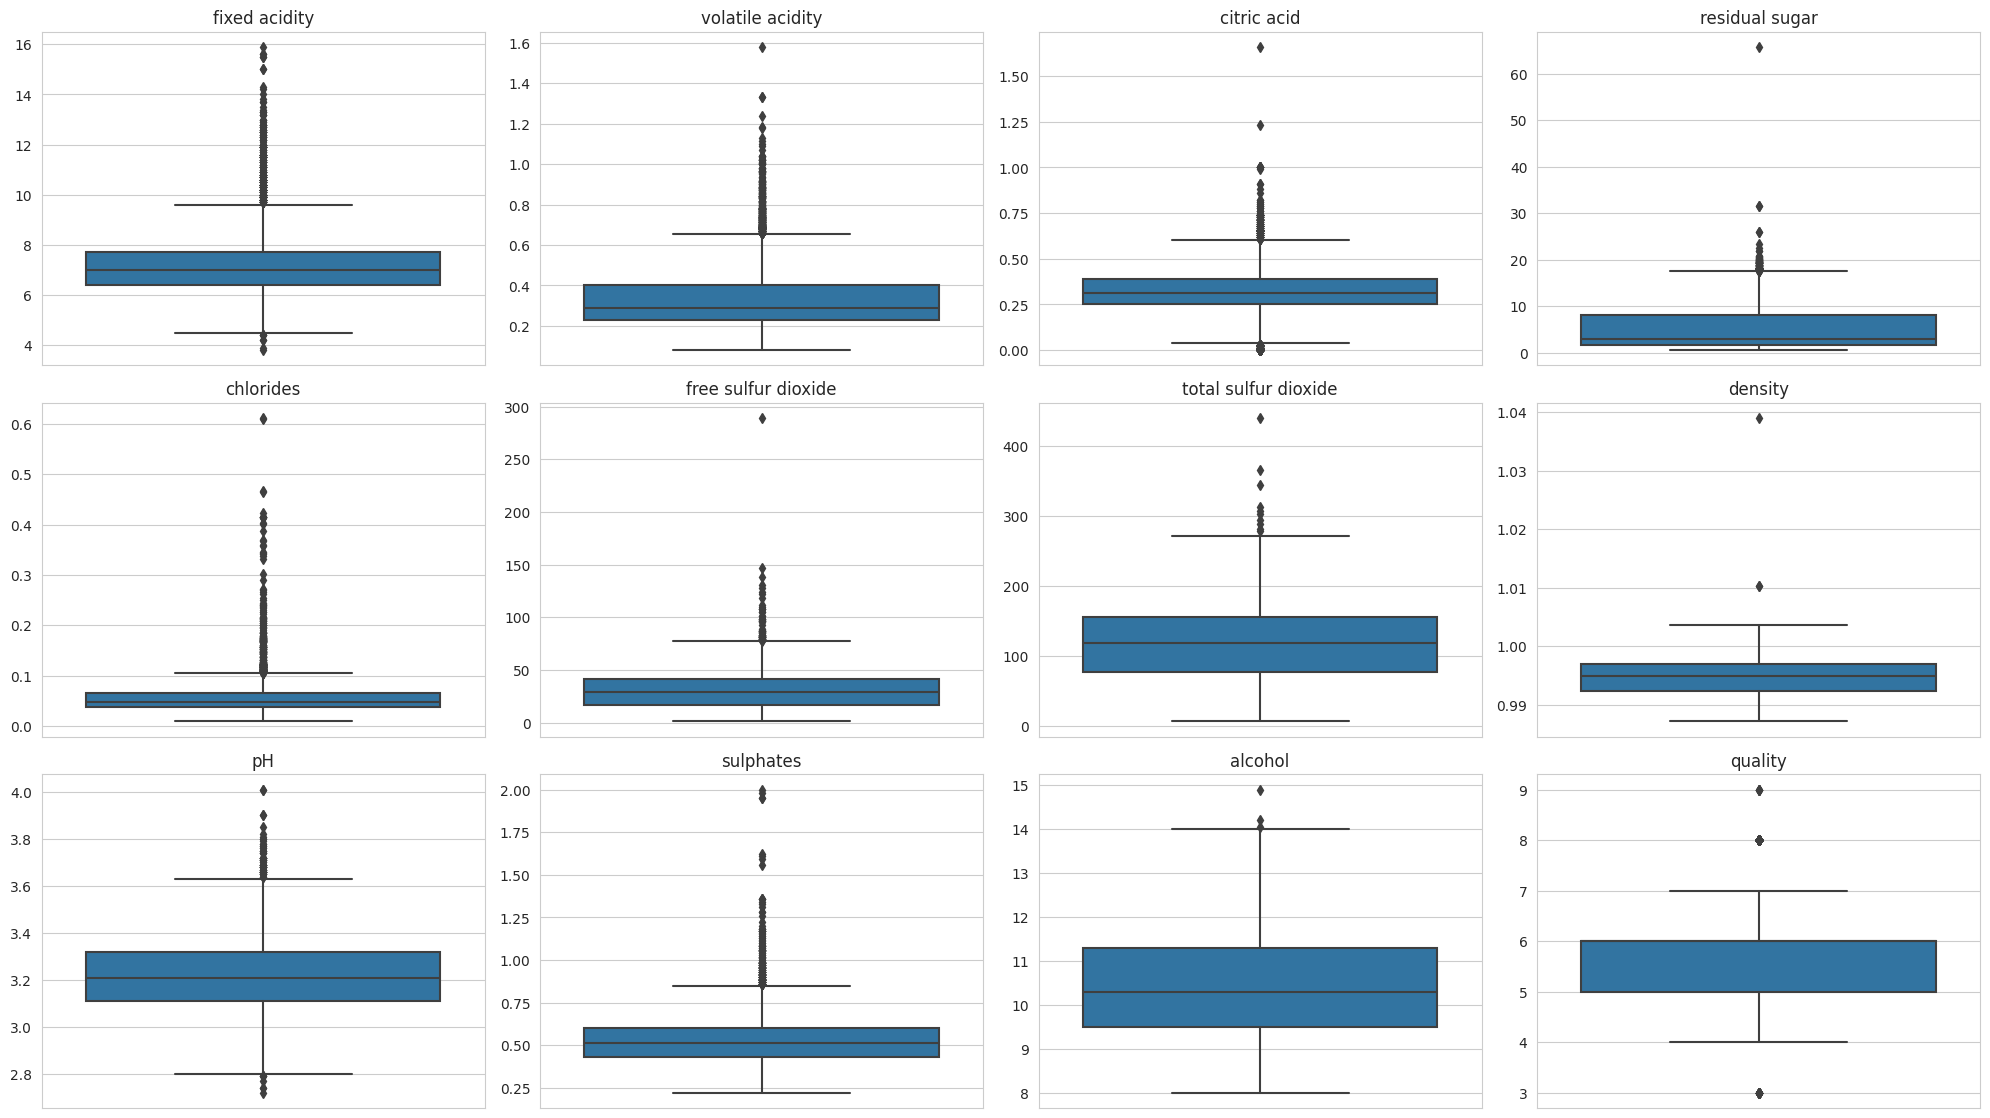

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the figure size
plt.figure(figsize=(20, 15))

# Plot boxplots for each numerical column
numerical_columns = wine_data.select_dtypes(include=['float64', 'int64']).columns
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(4, 4, i)
    sns.boxplot(y=wine_data[column])
    plt.title(column)
    plt.ylabel('')

# Adjust layout
plt.tight_layout()
plt.show()


## Step 3: Exploratory Data Analysis (EDA)

In this step, we'll aim to understand the dataset's characteristics and distributions by analyzing and visualizing its features. We'll focus on:



1. Distribution of wine types (white vs. red).
2. Distribution of wine quality.
3. Correlation between numerical features.
4. Analysis of wine quality against other features.







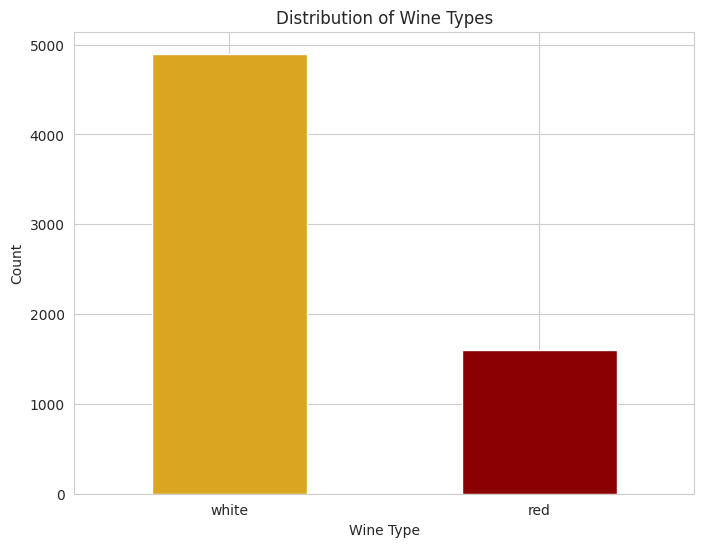

In [25]:
# Plot distribution of wine types
wine_type_counts = wine_data['type'].value_counts()

plt.figure(figsize=(8, 6))
wine_type_counts.plot(kind='bar', color=['#DAA520', '#8B0000'])
plt.title('Distribution of Wine Types')
plt.xlabel('Wine Type')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()


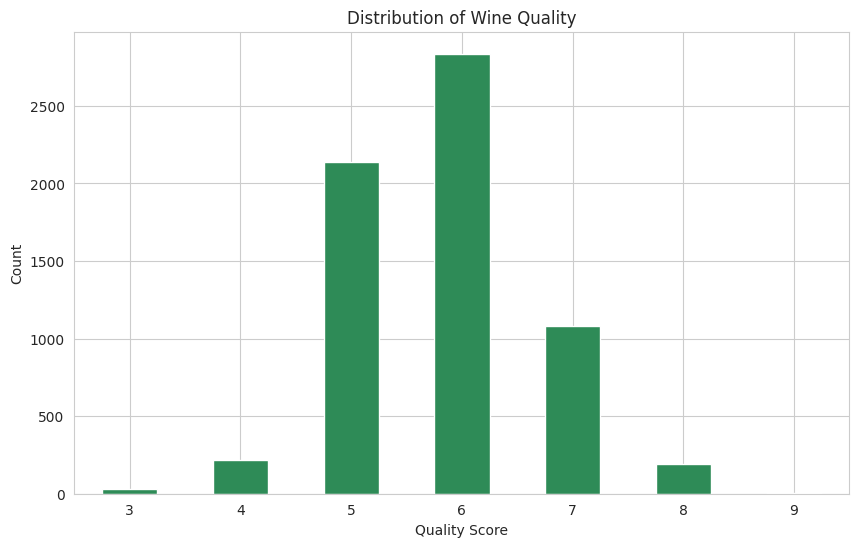

In [26]:
# Plot distribution of wine quality
quality_counts = wine_data['quality'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
quality_counts.plot(kind='bar', color='#2E8B57')
plt.title('Distribution of Wine Quality')
plt.xlabel('Quality Score')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()


<ipython-input-27-f3fafc0803e8>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlations = wine_data.corr()


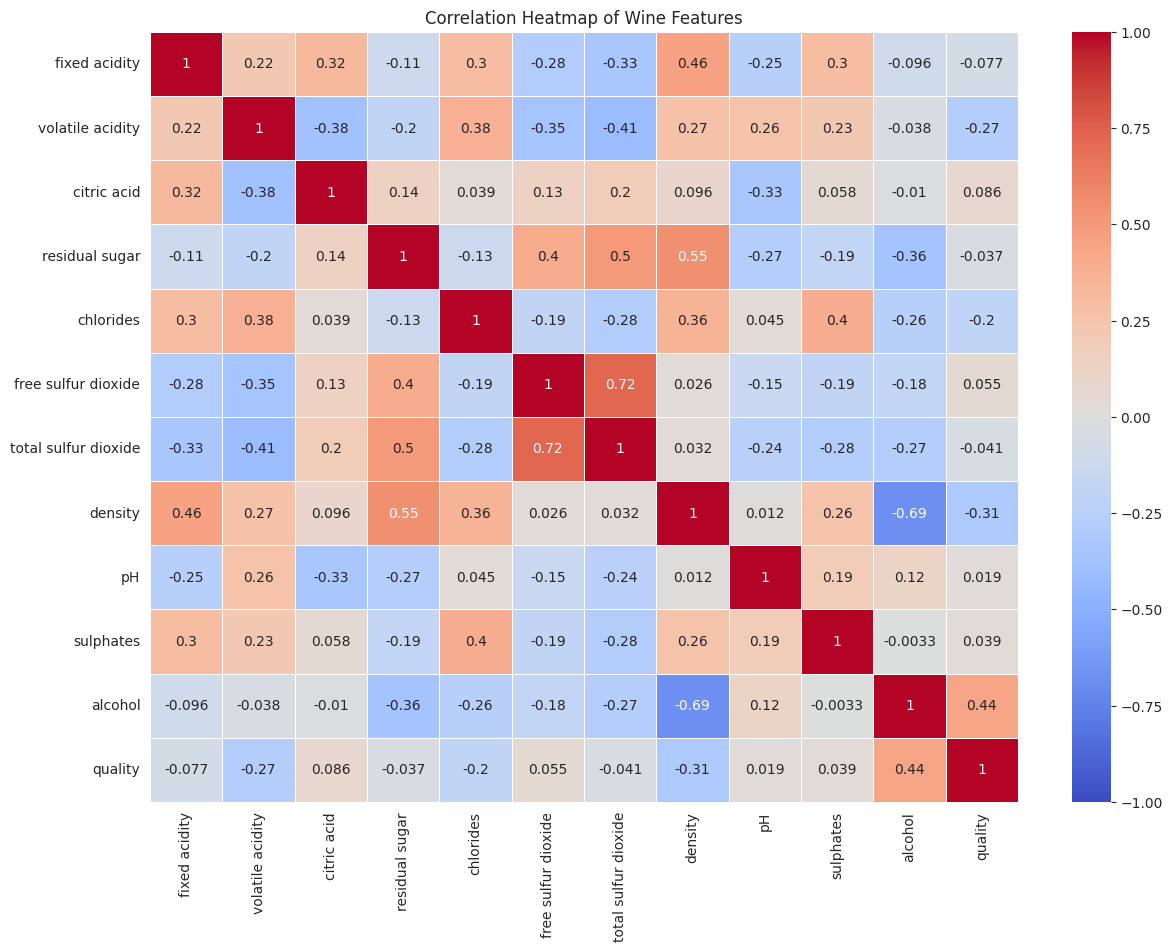

In [27]:
# Calculate correlations
correlations = wine_data.corr()

# Plot heatmap of correlations
plt.figure(figsize=(14, 10))
sns.heatmap(correlations, annot=True, cmap='coolwarm', vmin=-1, vmax=1, linewidths=0.5)
plt.title('Correlation Heatmap of Wine Features')
plt.show()


<ipython-input-28-538ee9ee9db9>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  quality_mean = wine_data.groupby('quality').mean()


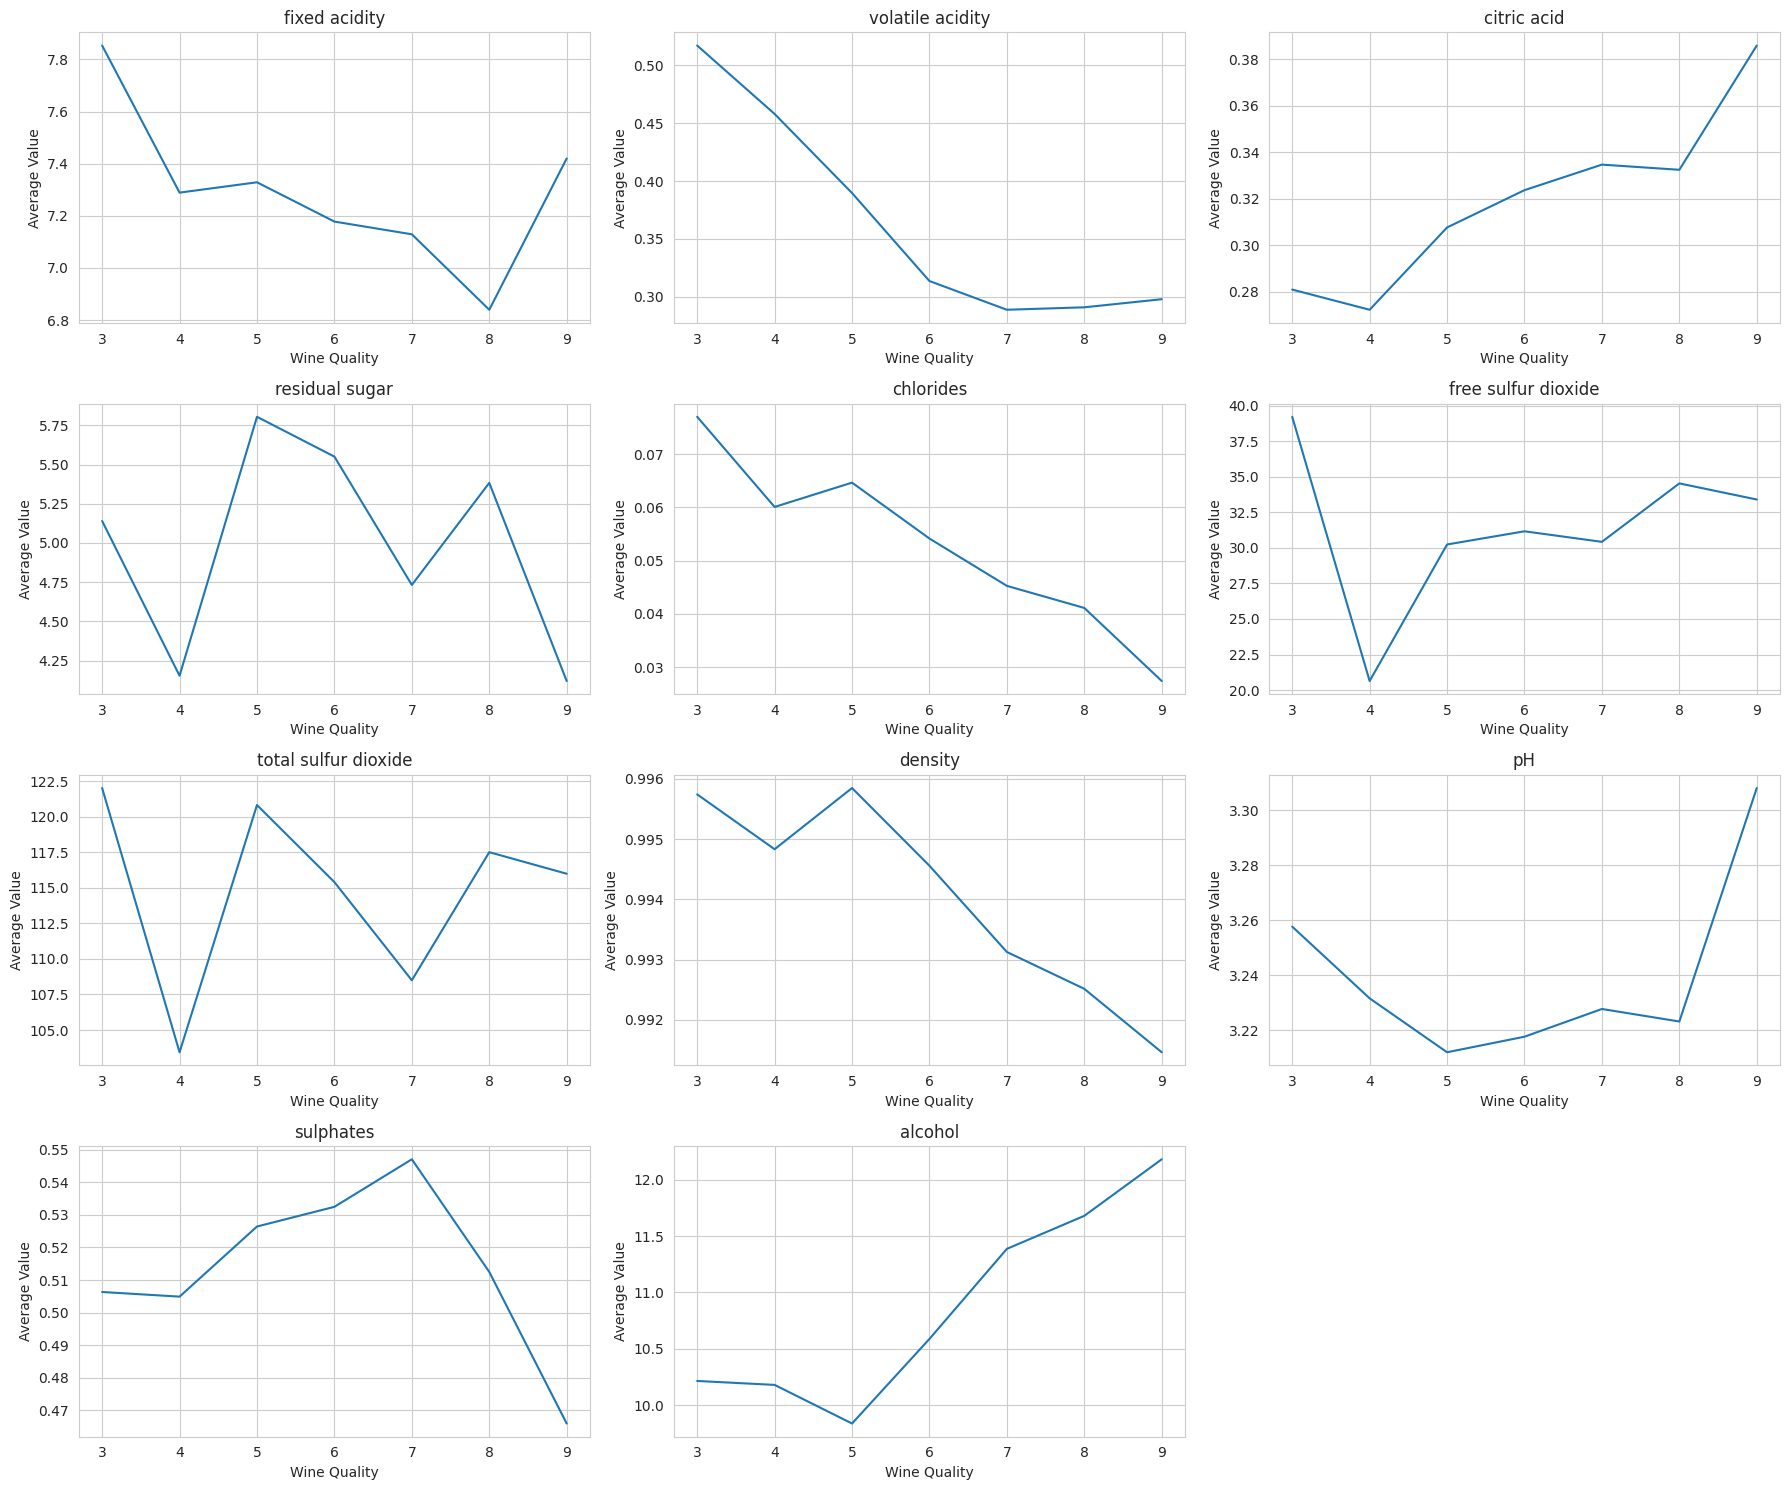

In [28]:
# Group by quality and calculate the mean for each feature
quality_mean = wine_data.groupby('quality').mean()

# Plot line plots for each feature against wine quality
plt.figure(figsize=(18, 15))

for i, column in enumerate(numerical_columns.drop('quality'), 1):
    if column != 'type':  # 'type' is not a numerical feature
        plt.subplot(4, 3, i)
        quality_mean[column].plot()
        plt.title(column)
        plt.xlabel('Wine Quality')
        plt.ylabel('Average Value')
        plt.grid(True)

plt.tight_layout()
plt.show()


## Storing Data into JSON for D3.js Visualization

In [67]:
# Prepare data for the interactive bar chart
wine_type_data = wine_type_counts.reset_index()
wine_type_data.columns = ['type', 'count']

# Convert the data to JSON format for use with D3.js
wine_type_json = wine_type_data.to_json(orient='records')

wine_type_json


'[{"type":"white","count":4898},{"type":"red","count":1599}]'

In [30]:
# Save the wine type data to a JSON file
wine_type_file_path = "wine_type_distribution.json"
wine_type_data.to_json(wine_type_file_path, orient='records')

wine_type_file_path

'wine_type_distribution.json'

In [61]:
# Prepare data for the interactive line chart
quality_mean_data = quality_mean.reset_index()

# Save the data to a JSON file
quality_mean_file_path = "quality_mean_data.json"
quality_mean_data_json = quality_mean_data.to_json(quality_mean_file_path, orient='records')

quality_mean_file_path ,quality_mean_data_json


('quality_mean_data.json',
 '[{"quality":3,"fixed acidity":7.8533333333,"volatile acidity":0.517,"citric acid":0.281,"residual sugar":5.14,"chlorides":0.0770333333,"free sulfur dioxide":39.2166666667,"total sulfur dioxide":122.0333333333,"density":0.995744,"pH":3.2576666667,"sulphates":0.5063333333,"alcohol":10.215},{"quality":4,"fixed acidity":7.2888888889,"volatile acidity":0.457962963,"citric acid":0.2723148148,"residual sugar":4.1537037037,"chlorides":0.0600972222,"free sulfur dioxide":20.6365740741,"total sulfur dioxide":103.4328703704,"density":0.9948326389,"pH":3.2316203704,"sulphates":0.5049074074,"alcohol":10.1800925926},{"quality":5,"fixed acidity":7.3285781104,"volatile acidity":0.3896749298,"citric acid":0.3077221703,"residual sugar":5.8041159963,"chlorides":0.064666043,"free sulfur dioxide":30.2373713751,"total sulfur dioxide":120.8391019645,"density":0.9958489874,"pH":3.2120392891,"sulphates":0.5264078578,"alcohol":9.8377829747},{"quality":6,"fixed acidity":7.1777856135,"

In [33]:
# Extract the required columns for the scatter plot
scatter_data = wine_data[['alcohol', 'quality']]

# Save the data to a JSON file
scatter_file_path = "alcohol_quality_scatter.json"
scatter_data.to_json(scatter_file_path, orient='records')

scatter_file_path


'alcohol_quality_scatter.json'

## D3.js Visualization

Creating an interactive charts using d3.js

In [68]:
from IPython.core.display import display, HTML
html_content = """<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <title>Wine Type Distribution</title>
    <script src="https://d3js.org/d3.v5.min.js"></script>
    <style>
        .bar {{
            fill: #DAA520;
            transition: fill 0.3s;
        }}
        .bar:hover {{
            fill: #8B0000;
        }}
        .tooltip {{
            position: absolute;
            text-align: center;
            width: 100px;
            height: 28px;
            padding: 2px;
            font: 12px sans-serif;
            background: lightsteelblue;
            border: 0px;
            border-radius: 8px;
            pointer-events: none;
        }}
    </style>
</head>
<body>
    <svg width="500" height="300"></svg>
    <div class="tooltip" style="opacity:0;"></div>

    <script>
        var data = {wine_type_json};

        var svg = d3.select("svg"),
            margin = {{top: 20, right: 20, bottom: 30, left: 40}},
            width = +svg.attr("width") - margin.left - margin.right,
            height = +svg.attr("height") - margin.top - margin.bottom;

        var x = d3.scaleBand().rangeRound([0, width]).padding(0.1),
            y = d3.scaleLinear().rangeRound([height, 0]);

        var g = svg.append("g")
            .attr("transform", "translate(" + margin.left + "," + margin.top + ")");

        x.domain(data.map(function(d) {{ return d.type; }}));
        y.domain([0, d3.max(data, function(d) {{ return d.count; }})]);

        g.append("g")
            .attr("class", "axis axis--x")
            .attr("transform", "translate(0," + height + ")")
            .call(d3.axisBottom(x));

        g.append("g")
            .attr("class", "axis axis--y")
            .call(d3.axisLeft(y).ticks(10))
            .append("text")
            .attr("transform", "rotate(-90)")
            .attr("y", 6)
            .attr("dy", "0.71em")
            .attr("text-anchor", "end")
            .text("Count");

        var bars = g.selectAll(".bar")
            .data(data)
            .enter().append("rect")
            .attr("class", "bar")
            .attr("x", function(d) {{ return x(d.type); }})
            .attr("y", height)
            .attr("width", x.bandwidth())
            .attr("height", 0);

        bars.transition()
            .duration(800)
            .attr("y", function(d) {{ return y(d.count); }})
            .attr("height", function(d) {{ return height - y(d.count); }});

        var tooltip = d3.select(".tooltip");

        bars.on("mouseover", function(d) {{
            tooltip.transition()
                .duration(200)
                .style("opacity", .9);
            tooltip.html(d.type + "<br>" + d.count)
                .style("left", (d3.event.pageX + 5) + "px")
                .style("top", (d3.event.pageY - 28) + "px");
        }})
        .on("mouseout", function(d) {{
            tooltip.transition()
                .duration(500)
                .style("opacity", 0);
        }});

        // Make the chart responsive
        window.addEventListener('resize', resize);

        function resize() {{
            width = +svg.node().getBoundingClientRect().width - margin.left - margin.right;
            x.rangeRound([0, width]);
            svg.selectAll('.axis.axis--x').call(d3.axisBottom(x));
            bars.attr('width', x.bandwidth()).attr('x', d => x(d.type));
        }}
    </script>
</body>
</html>
"""

In [69]:
import base64
html_content = html_content.format(wine_type_json = wine_type_json)
encoded = base64.b64encode(html_content.encode()).decode('utf-8')
iframe_code = f'<iframe src="data:text/html;base64,{encoded}" width="800" height="600"></iframe>'
display(HTML(iframe_code))

/usr/local/lib/python3.10/dist-packages/IPython/core/display.py:724: UserWarning: Consider using IPython.display.IFrame instead
  warnings.warn("Consider using IPython.display.IFrame instead")
